In [1]:
import pandas as pd

### Load dataset in df variable using pandas library

In [2]:
df = pd.read_csv('train.csv')

C:\Users\ASHUTOSH CHITRANSHI\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10,11,14,16,17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['ID', 'comp_name', 'website', 'op_status', 'domain', 'founded_on',
       'hq_country_code', 'hq_state_code', 'hq_region', 'hq_city',
       'total_funding_usd', 'funding_rounds', 'first_funding_date',
       'last_funding_date', 'num_investors', 'funding_duration',
       'first_funding_utc', 'last_funding_utc', 'successful_investment',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

 #### Info will help us to determine the data type of different columns, total number of features, total number of rows in our dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40213 entries, 0 to 40212
Data columns (total 27 columns):
ID                       40213 non-null int64
comp_name                40213 non-null object
website                  37746 non-null object
op_status                40213 non-null object
domain                   38007 non-null object
founded_on               29999 non-null object
hq_country_code          35699 non-null object
hq_state_code            34623 non-null object
hq_region                34965 non-null object
hq_city                  34967 non-null object
total_funding_usd        32549 non-null object
funding_rounds           40212 non-null object
first_funding_date       40213 non-null object
last_funding_date        40213 non-null object
num_investors            40213 non-null object
funding_duration         40213 non-null int64
first_funding_utc        40213 non-null object
last_funding_utc         40213 non-null object
successful_investment    40213 non-null int64
U

#### We observe that there are few unnamed useless columns which we need to drop

In [6]:
df = df.iloc[:,:19]

In [7]:
df.head()

,ID,comp_name,website,op_status,domain,founded_on,hq_country_code,hq_state_code,hq_region,hq_city,total_funding_usd,funding_rounds,first_funding_date,last_funding_date,num_investors,funding_duration,first_funding_utc,last_funding_utc,successful_investment
0,0,Nanotecture,http://www.nanotecture.co.uk,closed,Nanotechnology,NaN,GBR,M4,London,Southampton,6820000,1,2005-05-04,2005-05-04,4,0,12907,12907,0
1,1,Sybari,http://www.sybari.com,acquired,Email|Security|Software,1995-01-01,USA,NY,Long Island,East Northport,NaN,1,2001-03-30,2001-03-30,1,0,11411,11411,1
2,2,Futurederm,http://www.futurederm.com,operating,Beauty|Cosmetics|E-Commerce|Social Media,2009-06-07,USA,PA,Pittsburgh,Pittsburgh,165778,5,2012-10-25,2014-05-27,4,579,15638,16217,0
3,3,Mercora,http://mercora.com,closed,Curated Web,NaN,USA,CA,SF Bay Area,Sunnyvale,5000000,1,2005-01-01,2005-01-01,1,0,12784,12784,0
4,4,Datos IO,http://www.datos.io,operating,Big Data|Cloud Computing|Databases|Enterprise ...,2014-06-01,USA,CA,SF Bay Area,San Jose,15250000,2,2014-07-01,2015-09-15,4,441,16252,16693,0


#### describe will help us to determine about the scaling and range of our dataset

In [8]:
df.describe()

,ID,funding_duration,successful_investment
count,40213.000000,40213.000000,4.021300e+04
mean,20106.000000,436.388133,9.224409e+02
std,11608.637524,779.468602,1.848059e+05
min,0.000000,0.000000,0.000000e+00
25%,10053.000000,0.000000,0.000000e+00
50%,20106.000000,0.000000,0.000000e+00
75%,30159.000000,615.000000,0.000000e+00
max,40212.000000,36994.000000,3.705945e+07


### Count of null values

In [9]:
df.isnull().sum()

ID                           0
comp_name                    0
website                   2467
op_status                    0
domain                    2206
founded_on               10214
hq_country_code           4514
hq_state_code             5590
hq_region                 5248
hq_city                   5246
total_funding_usd         7664
funding_rounds               1
first_funding_date           0
last_funding_date            0
num_investors                0
funding_duration             0
first_funding_utc            0
last_funding_utc             0
successful_investment        0
dtype: int64

### Dropping few columns by simple reasoning

Clearly we have three columns which will surely not going to make any impact on prediction of sucessful investment. These columns are:-
1. ID
2. comp_name
3. website

So, we are going to drop these directly for furter smooth working on finding relationship between different features. 

In [10]:
df=df.drop('ID',axis=1)

In [11]:
df=df.drop('comp_name',axis=1)

In [12]:
df=df.drop('website',axis=1)

In [13]:
df.head()

,op_status,domain,founded_on,hq_country_code,hq_state_code,hq_region,hq_city,total_funding_usd,funding_rounds,first_funding_date,last_funding_date,num_investors,funding_duration,first_funding_utc,last_funding_utc,successful_investment
0,closed,Nanotechnology,NaN,GBR,M4,London,Southampton,6820000,1,2005-05-04,2005-05-04,4,0,12907,12907,0
1,acquired,Email|Security|Software,1995-01-01,USA,NY,Long Island,East Northport,NaN,1,2001-03-30,2001-03-30,1,0,11411,11411,1
2,operating,Beauty|Cosmetics|E-Commerce|Social Media,2009-06-07,USA,PA,Pittsburgh,Pittsburgh,165778,5,2012-10-25,2014-05-27,4,579,15638,16217,0
3,closed,Curated Web,NaN,USA,CA,SF Bay Area,Sunnyvale,5000000,1,2005-01-01,2005-01-01,1,0,12784,12784,0
4,operating,Big Data|Cloud Computing|Databases|Enterprise ...,2014-06-01,USA,CA,SF Bay Area,San Jose,15250000,2,2014-07-01,2015-09-15,4,441,16252,16693,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40213 entries, 0 to 40212
Data columns (total 16 columns):
op_status                40213 non-null object
domain                   38007 non-null object
founded_on               29999 non-null object
hq_country_code          35699 non-null object
hq_state_code            34623 non-null object
hq_region                34965 non-null object
hq_city                  34967 non-null object
total_funding_usd        32549 non-null object
funding_rounds           40212 non-null object
first_funding_date       40213 non-null object
last_funding_date        40213 non-null object
num_investors            40213 non-null object
funding_duration         40213 non-null int64
first_funding_utc        40213 non-null object
last_funding_utc         40213 non-null object
successful_investment    40213 non-null int64
dtypes: int64(2), object(14)
memory usage: 4.9+ MB


# Graphs

# 1. Scatterplot

We will draw scatter plot one by one among different columns to find relationship among themselves

In [15]:
import seaborn as sns

In [16]:
X=df['first_funding_utc'].astype(str)

In [17]:
Y=df['first_funding_date'].astype(str)

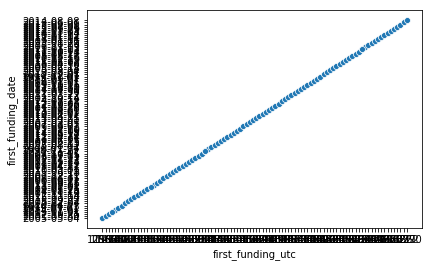

In [18]:
sns.scatterplot(X[:100],Y[:100])

#### Clearly from above scatter plot we observe that these two columns are directly proportional to each other, just to make sure this, we will draw graph with few more data points

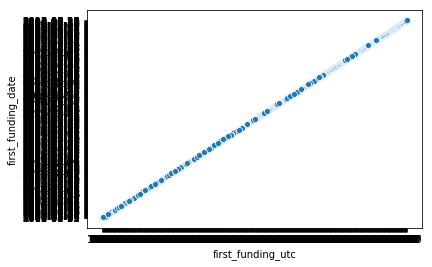

In [19]:
sns.scatterplot(X[100:1000],Y[100:1000])

In [20]:
X=df['last_funding_utc'].astype(str)

In [21]:
Y=df['last_funding_date'].astype(str)

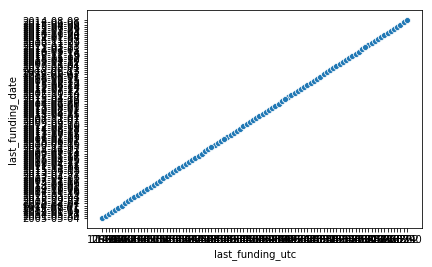

In [22]:
sns.scatterplot(X[:100],Y[:100])

#### Clearly from above scatter plot we observe that these two columns are directly proportional to each other, just to make sure this, we will draw graph with few more data points

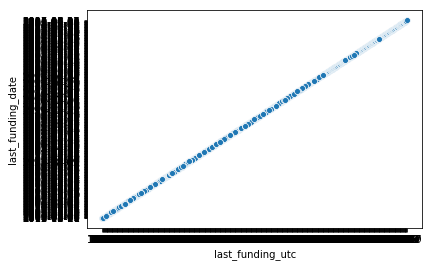

In [23]:
sns.scatterplot(X[100:1000],Y[100:1000])

In [24]:
X=df['last_funding_utc'].astype(str)

In [25]:
Y=df['first_funding_utc'].astype(str)

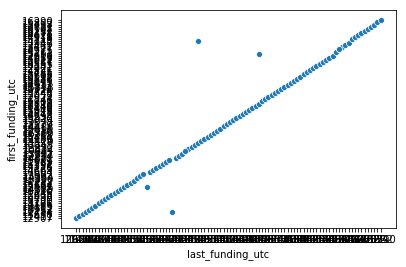

In [26]:
sns.scatterplot(X[:100],Y[:100])

#### Clearly from above scatter plot we observe that these two columns are directly proportional to each other with very few outliers, just to make sure this, we will draw graph with few more data points

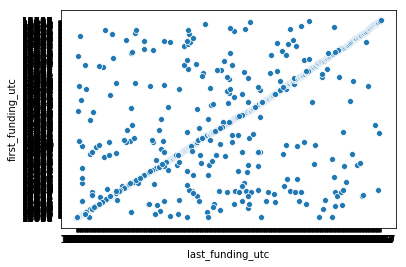

In [27]:
sns.scatterplot(X[:1000],Y[:1000])

#### Our assumption fails this time,but it works for first two times so we are going to drop following two columns because there impact lies in other columns
1. first_funding_date
2. last_funding_date

In [28]:
df=df.drop('first_funding_date',axis=1)

In [29]:
df=df.drop('last_funding_date',axis=1)

In [30]:
df.head()

,op_status,domain,founded_on,hq_country_code,hq_state_code,hq_region,hq_city,total_funding_usd,funding_rounds,num_investors,funding_duration,first_funding_utc,last_funding_utc,successful_investment
0,closed,Nanotechnology,NaN,GBR,M4,London,Southampton,6820000,1,4,0,12907,12907,0
1,acquired,Email|Security|Software,1995-01-01,USA,NY,Long Island,East Northport,NaN,1,1,0,11411,11411,1
2,operating,Beauty|Cosmetics|E-Commerce|Social Media,2009-06-07,USA,PA,Pittsburgh,Pittsburgh,165778,5,4,579,15638,16217,0
3,closed,Curated Web,NaN,USA,CA,SF Bay Area,Sunnyvale,5000000,1,1,0,12784,12784,0
4,operating,Big Data|Cloud Computing|Databases|Enterprise ...,2014-06-01,USA,CA,SF Bay Area,San Jose,15250000,2,4,441,16252,16693,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40213 entries, 0 to 40212
Data columns (total 14 columns):
op_status                40213 non-null object
domain                   38007 non-null object
founded_on               29999 non-null object
hq_country_code          35699 non-null object
hq_state_code            34623 non-null object
hq_region                34965 non-null object
hq_city                  34967 non-null object
total_funding_usd        32549 non-null object
funding_rounds           40212 non-null object
num_investors            40213 non-null object
funding_duration         40213 non-null int64
first_funding_utc        40213 non-null object
last_funding_utc         40213 non-null object
successful_investment    40213 non-null int64
dtypes: int64(2), object(12)
memory usage: 4.3+ MB


### Before we go for some more data visualisation we need to look our columns having null values and dtype = objects

#### 1. op_status

In [32]:
df['op_status'].value_counts()

operating                        31098
acquired                          4464
closed                            3799
ipo                                849
http://www.fortodo.com               1
http://centers.fortodo.com           1
 http//www.dreamlines.com.br         1
Name: op_status, dtype: int64

We need to drop rows having website instead of operational status

In [33]:
for key, value in df['op_status'].iteritems(): 
    if value=='http://www.fortodo.com':
        print(key)

17070


In [34]:
df=df.drop(17070,axis=0)

In [35]:
for key, value in df['op_status'].iteritems(): 
    if value=='http://centers.fortodo.com':
        print(key)

31258


In [36]:
df=df.drop(31258,axis=0)

In [37]:
for key, value in df['op_status'].iteritems(): 
    if value.strip()=='http//www.dreamlines.com.br':
        print(key)

7652


In [38]:
df=df.drop(7652,axis=0)

Now, we use labelencoder to change assign int32 values to object type

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
lb=LabelEncoder()

In [41]:
df['op_status']= lb.fit_transform(df['op_status'])

In [42]:
df['op_status'].head()

0    1
1    0
2    3
3    1
4    3
Name: op_status, dtype: int32

#### 2. Drop null values

In [43]:
df=df.dropna()

In [44]:
df.head()

,op_status,domain,founded_on,hq_country_code,hq_state_code,hq_region,hq_city,total_funding_usd,funding_rounds,num_investors,funding_duration,first_funding_utc,last_funding_utc,successful_investment
2,3,Beauty|Cosmetics|E-Commerce|Social Media,2009-06-07,USA,PA,Pittsburgh,Pittsburgh,165778,5,4,579,15638,16217,0
4,3,Big Data|Cloud Computing|Databases|Enterprise ...,2014-06-01,USA,CA,SF Bay Area,San Jose,15250000,2,4,441,16252,16693,0
5,2,Consumer Goods|Crowdsourcing|Delivery|E-Commer...,1994-07-05,USA,WA,Seattle,Seattle,8000000,1,1,0,9312,9312,1
7,1,iPhone|Location Based Services|Messaging|Mobil...,2009-07-01,USA,CA,SF Bay Area,San Jose,50000,1,1,0,14706,14706,0
11,3,Cable|Internet|Web Hosting,2002-01-01,USA,WA,Seattle,Kirkland,1180000000,2,5,918,15658,16576,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22989 entries, 2 to 40212
Data columns (total 14 columns):
op_status                22989 non-null int32
domain                   22989 non-null object
founded_on               22989 non-null object
hq_country_code          22989 non-null object
hq_state_code            22989 non-null object
hq_region                22989 non-null object
hq_city                  22989 non-null object
total_funding_usd        22989 non-null object
funding_rounds           22989 non-null object
num_investors            22989 non-null object
funding_duration         22989 non-null int64
first_funding_utc        22989 non-null object
last_funding_utc         22989 non-null object
successful_investment    22989 non-null int64
dtypes: int32(1), int64(2), object(11)
memory usage: 2.5+ MB


#### 3. LabelEncoder for categorical columns

In [46]:
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))

In [47]:
df.head()

,op_status,domain,founded_on,hq_country_code,hq_state_code,hq_region,hq_city,total_funding_usd,funding_rounds,num_investors,funding_duration,first_funding_utc,last_funding_utc,successful_investment
2,3,3371,981,94,208,568,1621,2259,14,34,579,2886,2920,0
4,3,3573,2271,94,103,608,1823,1879,11,34,441,3459,3371,0
5,2,5846,135,94,241,640,1880,9151,0,1,0,3925,3450,1
7,1,11756,994,94,103,608,1823,7033,0,1,0,2080,1620,0
11,3,4426,307,94,241,640,1051,724,11,45,918,2905,3259,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22989 entries, 2 to 40212
Data columns (total 14 columns):
op_status                22989 non-null int32
domain                   22989 non-null int32
founded_on               22989 non-null int32
hq_country_code          22989 non-null int32
hq_state_code            22989 non-null int32
hq_region                22989 non-null int32
hq_city                  22989 non-null int32
total_funding_usd        22989 non-null int32
funding_rounds           22989 non-null int32
num_investors            22989 non-null int32
funding_duration         22989 non-null int64
first_funding_utc        22989 non-null int32
last_funding_utc         22989 non-null int32
successful_investment    22989 non-null int64
dtypes: int32(12), int64(2)
memory usage: 1.6 MB


### More Visualisation 

## 2. Histograms

Histograms are drawn to observe whether the given dataset is uniform or not

If we find any feature as completely uniform we will drop that column

In [49]:
import matplotlib.pyplot as plt

In [50]:
%matplotlib inline

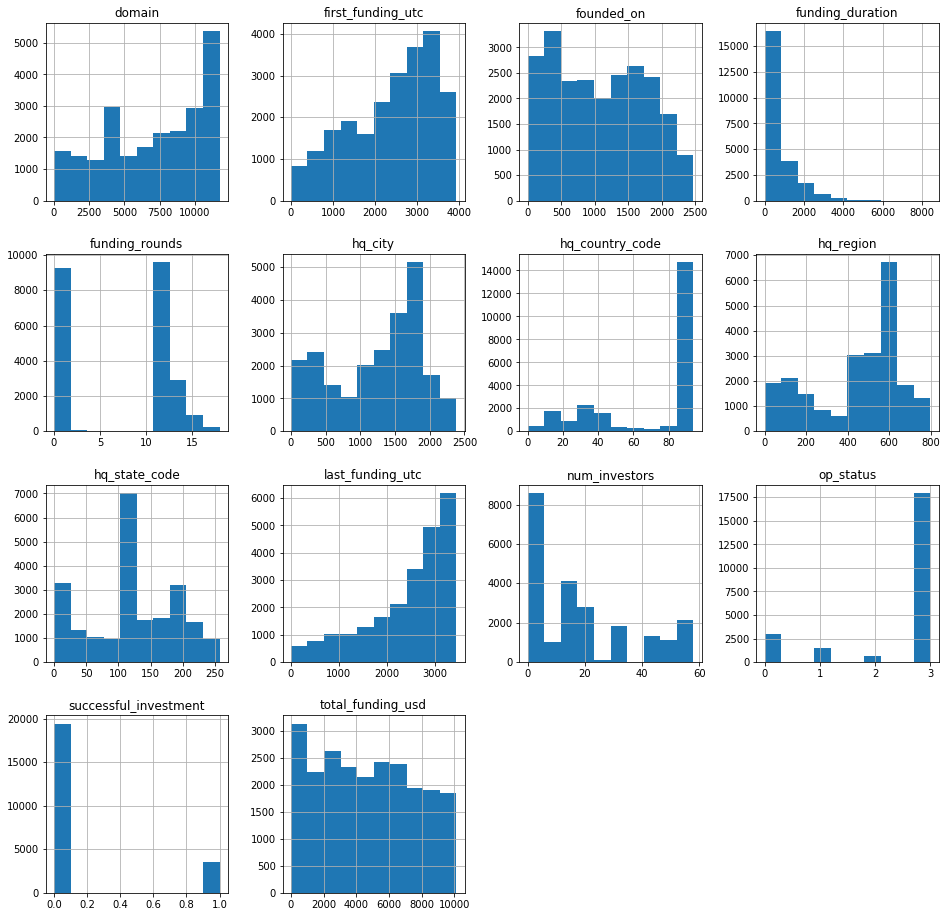

In [51]:
df.hist(figsize=(16,16))
plt.show()

## 3. HeatMap

Heatmap is used to find existing corelation among different columns, using different colurs

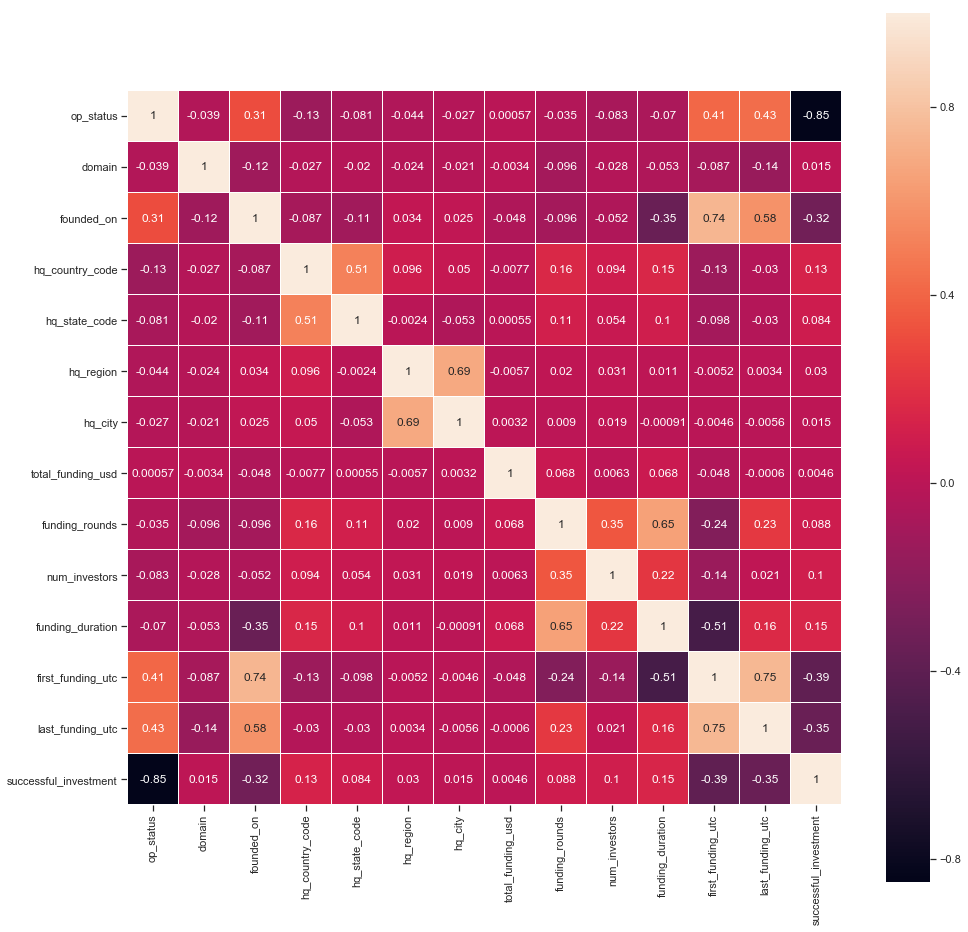

In [52]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(16,16))
corr=df.corr()
sns.set(style='ticks',color_codes=True)
sns.heatmap(corr,linewidths=0.3,square=True,linecolor='white',annot=True)
plt.show()

# Training

## First step is to divide given training data in two parts training and testing

For this we will use train-test-split of sklearn library

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = df.drop('successful_investment',axis=1)

In [55]:
X.head()

,op_status,domain,founded_on,hq_country_code,hq_state_code,hq_region,hq_city,total_funding_usd,funding_rounds,num_investors,funding_duration,first_funding_utc,last_funding_utc
2,3,3371,981,94,208,568,1621,2259,14,34,579,2886,2920
4,3,3573,2271,94,103,608,1823,1879,11,34,441,3459,3371
5,2,5846,135,94,241,640,1880,9151,0,1,0,3925,3450
7,1,11756,994,94,103,608,1823,7033,0,1,0,2080,1620
11,3,4426,307,94,241,640,1051,724,11,45,918,2905,3259


In [56]:
y = df.iloc[:,13:]

In [57]:
y.head()

,successful_investment
2,0
4,0
5,1
7,0
11,0


In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### Logistic Regression

In [2]:
from sklearn.linear_model import LogisticRegression

In [60]:
model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')

In [61]:
model.fit(X_train,y_train)

C:\Users\ASHUTOSH CHITRANSHI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASHUTOSH CHITRANSHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
pred = model.predict(X_test)

#### Accuracy score for logistic Regression

In [63]:
from sklearn import metrics

In [64]:
metrics.accuracy_score(y_test,pred)

0.8529795563288386

### KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
model1 = KNeighborsClassifier(n_neighbors=7,weights='distance')

In [67]:
model1.fit(X_train,y_train)

C:\Users\ASHUTOSH CHITRANSHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='distance')

In [68]:
pred1 = model1.predict(X_test)

#### Accuracy score for KNN

In [69]:
metrics.accuracy_score(y_test,pred1)

0.8460200086994345

### Gradient Boosting Classifier

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
model2 = GradientBoostingClassifier(n_estimators=80)

In [72]:
model2.fit(X_train,y_train)

C:\Users\ASHUTOSH CHITRANSHI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [73]:
pred2 = model2.predict(X_test)

#### Accuracy for GradientBoosting Classifier

In [74]:
metrics.accuracy_score(y_test,pred2)

1.0

## We got 1.0 accuracy score for GradientBoosting Classifier Algorithm

### We will calculate Confusion Matrix now

In [75]:
metrics.confusion_matrix(y_test,pred2)

array([[5826,    0],
       [   0, 1071]], dtype=int64)

#### This is also perfect so we conclude with this

### Load test file into dataframe

In [79]:
test = pd.read_csv('test.csv')

In [80]:
test.columns

Index(['ID', 'comp_name', 'website', 'op_status', 'domain', 'founded_on',
       'hq_country_code', 'hq_state_code', 'hq_region', 'hq_city',
       'total_funding_usd', 'funding_rounds', 'first_funding_date',
       'last_funding_date', 'num_investors', 'funding_duration',
       'first_funding_utc', 'last_funding_utc', 'Unnamed: 18'],
      dtype='object')

 #### Info will help us to determine the data type of different columns, total number of features, total number of rows in our dataset

In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 19 columns):
ID                    4469 non-null int64
comp_name             4468 non-null object
website               4185 non-null object
op_status             4469 non-null object
domain                4256 non-null object
founded_on            3279 non-null object
hq_country_code       4001 non-null object
hq_state_code         3893 non-null object
hq_region             3914 non-null object
hq_city               3914 non-null object
total_funding_usd     3619 non-null object
funding_rounds        4469 non-null int64
first_funding_date    4469 non-null object
last_funding_date     4469 non-null object
num_investors         4469 non-null object
funding_duration      4469 non-null int64
first_funding_utc     4469 non-null int64
last_funding_utc      4469 non-null int64
Unnamed: 18           1 non-null float64
dtypes: float64(1), int64(5), object(13)
memory usage: 663.4+ KB


#### We observe that there are few unnamed useless columns which we need to drop

In [82]:
test=test.iloc[:,:18]

In [83]:
test.head()

,ID,comp_name,website,op_status,domain,founded_on,hq_country_code,hq_state_code,hq_region,hq_city,total_funding_usd,funding_rounds,first_funding_date,last_funding_date,num_investors,funding_duration,first_funding_utc,last_funding_utc
0,0,MDLIVE,http://mdlive.com,operating,Health Care,2009-01-01,USA,FL,Ft. Lauderdale,Fort Lauderdale,73600000,2,2014-01-22,2015-06-24,5,518,16092,16610
1,1,APX Labs,http://apx-labs.com,operating,Software,2010-01-01,USA,VA,"Washington, D.C.",Herndon,28612936,3,2014-04-02,2015-11-18,7,595,16162,16757
2,2,9Cookies,http://www.9cookies.com/,acquired,Point of Sale|Restaurants,2012-01-01,DEU,16,Berlin,Berlin,NaN,1,2013-04-18,2013-04-18,1,0,15813,15813
3,3,Confluence Solar,http://www.confluencesolar.com,acquired,Clean Technology,NaN,USA,MO,St. Louis,Hazelwood,12700000,1,2008-09-24,2008-09-24,3,0,14146,14146
4,4,Dazo,http://dazo.in,operating,Mobile,2014-01-01,IND,19,Bangalore,Bangalore,NaN,1,2015-04-01,2015-04-01,7,0,16526,16526


#### describe will help us to determine about the scaling and range of our dataset

In [85]:
test.describe()

,ID,funding_rounds,funding_duration,first_funding_utc,last_funding_utc
count,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000
mean,2234.000000,113.813605,447.085030,14980.072947,15430.740210
std,1290.233506,7479.337967,777.793376,1449.442664,1327.394772
min,0.000000,1.000000,0.000000,0.000000,7412.000000
25%,1117.000000,1.000000,0.000000,14092.000000,14880.000000
50%,2234.000000,1.000000,0.000000,15400.000000,15918.000000
75%,3351.000000,2.000000,640.000000,16084.000000,16394.000000
max,4468.000000,500000.000000,6070.000000,16769.000000,16781.000000


### Count of null values

In [86]:
test.isnull().sum()

ID                       0
comp_name                1
website                284
op_status                0
domain                 213
founded_on            1190
hq_country_code        468
hq_state_code          576
hq_region              555
hq_city                555
total_funding_usd      850
funding_rounds           0
first_funding_date       0
last_funding_date        0
num_investors            0
funding_duration         0
first_funding_utc        0
last_funding_utc         0
dtype: int64

### Dropping columns we drop in training file

In [87]:
test=test.drop('ID',axis=1)

In [88]:
test=test.drop('comp_name',axis=1)

In [89]:
test=test.drop('website',axis=1)

In [90]:
test=test.drop('first_funding_date',axis=1)

In [91]:
test=test.drop('last_funding_date',axis=1)

In [92]:
test.head()

,op_status,domain,founded_on,hq_country_code,hq_state_code,hq_region,hq_city,total_funding_usd,funding_rounds,num_investors,funding_duration,first_funding_utc,last_funding_utc
0,operating,Health Care,2009-01-01,USA,FL,Ft. Lauderdale,Fort Lauderdale,73600000,2,5,518,16092,16610
1,operating,Software,2010-01-01,USA,VA,"Washington, D.C.",Herndon,28612936,3,7,595,16162,16757
2,acquired,Point of Sale|Restaurants,2012-01-01,DEU,16,Berlin,Berlin,NaN,1,1,0,15813,15813
3,acquired,Clean Technology,NaN,USA,MO,St. Louis,Hazelwood,12700000,1,3,0,14146,14146
4,operating,Mobile,2014-01-01,IND,19,Bangalore,Bangalore,NaN,1,7,0,16526,16526


In [94]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 13 columns):
op_status            4469 non-null object
domain               4256 non-null object
founded_on           3279 non-null object
hq_country_code      4001 non-null object
hq_state_code        3893 non-null object
hq_region            3914 non-null object
hq_city              3914 non-null object
total_funding_usd    3619 non-null object
funding_rounds       4469 non-null int64
num_investors        4469 non-null object
funding_duration     4469 non-null int64
first_funding_utc    4469 non-null int64
last_funding_utc     4469 non-null int64
dtypes: int64(4), object(9)
memory usage: 454.0+ KB


### Before we go for testing we need to look our columns having null values and dtype = objects

In [95]:
label_encoder = LabelEncoder()

In [97]:
test['op_status']= label_encoder.fit_transform(test['op_status'])

In [98]:
test.isnull().sum()

op_status               0
domain                213
founded_on           1190
hq_country_code       468
hq_state_code         576
hq_region             555
hq_city               555
total_funding_usd     850
funding_rounds          0
num_investors           0
funding_duration        0
first_funding_utc       0
last_funding_utc        0
dtype: int64

#### Using DataImputer for filling null values in columns

In [102]:
import pandas as pd
import numpy as np
from sklearn.base import TransformerMixin
class DataImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [107]:
test = DataImputer().fit_transform(test)

In [108]:
test.head()

,op_status,domain,founded_on,hq_country_code,hq_state_code,hq_region,hq_city,total_funding_usd,funding_rounds,num_investors,funding_duration,first_funding_utc,last_funding_utc
0,4,Health Care,2009-01-01,USA,FL,Ft. Lauderdale,Fort Lauderdale,73600000,2,5,518,16092,16610
1,4,Software,2010-01-01,USA,VA,"Washington, D.C.",Herndon,28612936,3,7,595,16162,16757
2,0,Point of Sale|Restaurants,2012-01-01,DEU,16,Berlin,Berlin,2000000,1,1,0,15813,15813
3,0,Clean Technology,2012-01-01,USA,MO,St. Louis,Hazelwood,12700000,1,3,0,14146,14146
4,4,Mobile,2014-01-01,IND,19,Bangalore,Bangalore,2000000,1,7,0,16526,16526


#### Using label for filling null values

In [109]:
for column in test.columns:
    if test[column].dtype == type(object):
        le = LabelEncoder()
        test[column] = le.fit_transform(test[column].astype(str))

In [110]:
test.head()

,op_status,domain,founded_on,hq_country_code,hq_state_code,hq_region,hq_city,total_funding_usd,funding_rounds,num_investors,funding_duration,first_funding_utc,last_funding_utc
0,4,1817,234,74,101,147,309,1661,2,37,518,16092,16610
1,4,2278,286,74,180,439,389,863,3,41,595,16162,16757
2,0,2190,404,18,7,44,84,560,1,0,0,15813,15813
3,0,832,404,74,141,387,383,194,1,23,0,14146,14146
4,4,2093,606,35,10,31,58,560,1,41,0,16526,16526


## Test Prediction

In [111]:
test_pred = model2.predict(test)

In [112]:
test_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

Check size to make sure everything is correct

In [113]:
yy=[]

In [114]:
for i in range(4469):
    yy.append(i)

In [115]:
predi=pd.DataFrame(test_pred)
predi.rename(columns={0:'successful_investment'},inplace=True)
predi['ID']=yy
predi = predi[['ID','successful_investment']]

In [116]:
predi.to_csv('result.csv',index=False)

Confirm whether file is prepared correctly

In [117]:
predi.head()

,ID,successful_investment
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0
